In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: C:\Users\usert\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# 1. Baca dataset yang sudah dipreprocessing dari folder Dataset
file_path_X = r'D:\Semester 6\Capstone\Andika\Dataset\fitur_cleaned.csv'
file_path_y = r'D:\Semester 6\Capstone\Andika\Dataset\kelas_cleaned.csv'

X = pd.read_csv(file_path_X)
y = pd.read_csv(file_path_y)

In [4]:
# 2. Pilih hanya fitur 'ph', 'Turbidity', dan 'Solids' untuk training
X = X[['ph', 'Turbidity', 'Solids']]  # hanya fitur ini yang digunakan


In [5]:
# 3. Normalisasi dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 4. Split dataset jadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# 5. Tentukan rentang parameter C dan gamma yang dapat diubah secara manual
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # Lebih banyak variasi nilai C
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]  # Lebih banyak variasi nilai gamma
}

In [ ]:
# 6. Lakukan grid search dengan SVM
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# 7. Tampilkan nilai terbaik untuk C dan gamma
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
print(f"Nilai terbaik untuk C: {best_C}")
print(f"Nilai terbaik untuk gamma: {best_gamma}")

Nilai terbaik untuk C: 10
Nilai terbaik untuk gamma: 0.1


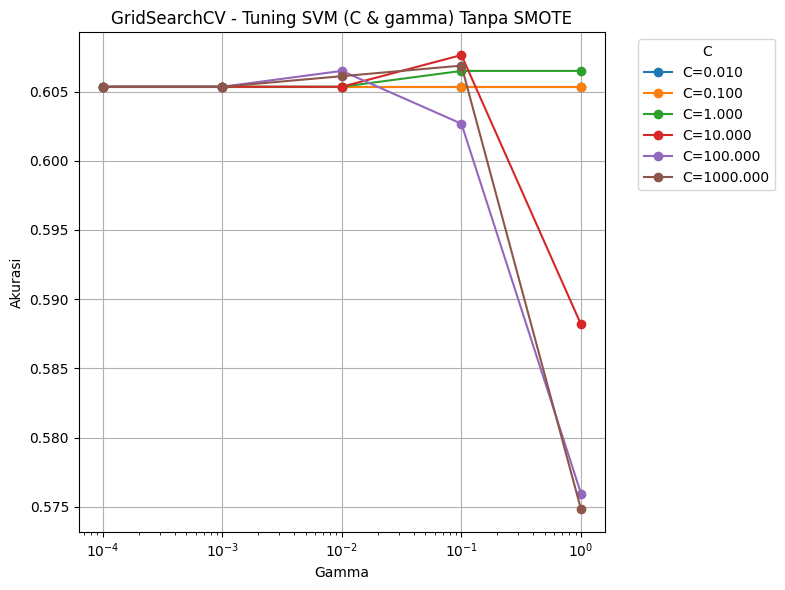

In [ ]:
# 8. Plot hasil GridSearchCV
# Mendapatkan hasil GridSearchCV dan merapikan data untuk plot
results = grid_search.cv_results_
mean_scores = np.array(results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Membuat plot
plt.figure(figsize=(8, 6))
for i, C in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], mean_scores[i], label=f'C={C:.3f}', marker='o')

plt.xlabel('Gamma')
plt.ylabel('Akurasi')
plt.title('GridSearchCV - Tuning SVM (C & gamma) Tanpa SMOTE')
plt.xscale('log')  # Karena gamma dan C diambil dalam skala logaritmik
plt.yscale('linear')
plt.legend(title='C', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 9. Menampilkan nilai C dan gamma terbaik sebelum melakukan tuning manual
print(f"Nilai terbaik untuk C yang ditemukan adalah: {best_C}")
print(f"Nilai terbaik untuk gamma yang ditemukan adalah: {best_gamma}")

# 11. Validasi model dengan parameter yang sudah diubah
model = SVC(kernel='linear', C=best_C, gamma=best_gamma)
#model = SVC(kernel='rbf', C=10, gamma=0.1, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluasi model dengan data testing
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

Nilai terbaik untuk C yang ditemukan adalah: 10
Nilai terbaik untuk gamma yang ditemukan adalah: 0.1


C:\Users\usert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi model: 62.96%
